In [1]:
import torch
import torch.nn as nn
import clip
import os

In [2]:
dinov2_vits = torch.hub.load('facebookresearch/dinov2', "dinov2_vits14")

Using cache found in /srv/home/zxu444/.cache/torch/hub/facebookresearch_dinov2_main


In [3]:
qkv_weights = dinov2_vits.blocks[0].attn.qkv.weight.data

In [5]:
qkv_weights.shape

torch.Size([1152, 384])

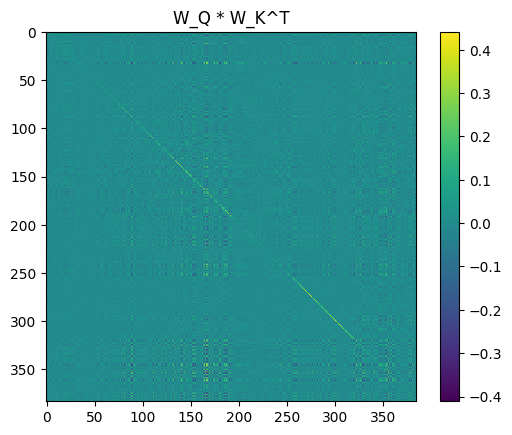

In [6]:
# Split the weights
d = qkv_weights.shape[0] // 3
W_Q = qkv_weights[:d]
W_K = qkv_weights[d:2*d]
W_V = qkv_weights[2*d:]

# Compute W_Q * W_K^T
product = W_Q @ W_K.t()

# Visualization (using matplotlib for simplicity)
import matplotlib.pyplot as plt

plt.imshow(product, cmap='viridis')
plt.colorbar()
plt.title("W_Q * W_K^T")
plt.show()

In [7]:
weights = torch.hub.load("pytorch/vision", "get_weight", name="ViT_B_32_Weights.IMAGENET1K_V1")

torch_vitb = torch.hub.load("pytorch/vision", "vit_b_32", weights=weights)
torch_vitb

Using cache found in /srv/home/zxu444/.cache/torch/hub/pytorch_vision_main
Using cache found in /srv/home/zxu444/.cache/torch/hub/pytorch_vision_main


VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [9]:
in_proj_weights = torch_vitb.encoder.layers.encoder_layer_0.self_attention.in_proj_weight.data
print(in_proj_weights.shape)

torch.Size([2304, 768])


In [10]:
num_heads = torch_vitb.encoder.layers.encoder_layer_0.self_attention.num_heads
num_heads

12